In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.model_selection
import sklearn.tree as trees
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score, roc_curve, precision_recall_curve, auc, roc_auc_score
from sklearn.tree._tree import TREE_LEAF
from sklearn.model_selection import cross_val_score
from sklearn.metrics.scorer import make_scorer

In [65]:
#!wget https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Hitters.csv

In [66]:
data = pd.read_csv('Hitters.csv').dropna()
features = ['Hits','HmRun','Years','Assists','RBI','Walks','AtBat']
#features = ['Hits','Years']
Y = np.log(data['Salary'])
X = data[features]


# Split in train and test
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y, test_size=0.5)


# Initialize fitting method, fit and predict
f = trees.DecisionTreeRegressor()
#  Fit with train
f.fit(X_train, Y_train)
X_train.shape
y_test = f.predict(X_test)
y_train = f.predict(X_train)
#f.score(X_test, Y_test)
#mse(Y_train,y_train)
mse(Y_test,y_test)

0.7195775644229366

De acuerdo a Cross-Validation, el mejor árbol tiene : 9 hojas


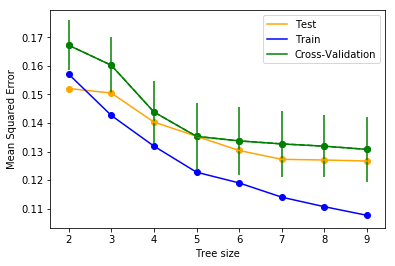

In [120]:
maxLeaves= 10
n0 = 2
msesTest = np.zeros((maxLeaves-n0))
msesTrain = np.zeros((maxLeaves-n0))
kfoldcv = np.zeros((maxLeaves-n0))
kerror = np.zeros((maxLeaves-n0))

nleaves = np.arange(n0,maxLeaves)
for i in nleaves:
    model = trees.DecisionTreeRegressor(max_leaf_nodes=i, min_samples_split =0.05, 
                                        min_samples_leaf=1,min_weight_fraction_leaf=0.0)
    model.fit(X_train, Y_train)
    y_test = model.predict(X_test)
    y_train = model.predict(X_train)
    msesTest[i-n0] = mse(Y_test,y_test)
    msesTrain[i-n0] = mse(Y_train,y_train)
    kscores = cross_val_score(estimator=model,scoring=make_scorer(mse), X=X_train, y=Y_train, cv=6)
    kfoldcv[i-n0] = kscores.mean()
    kerror[i-n0] = kscores.std()/np.sqrt(6)
    
    
print("De acuerdo a Cross-Validation, el mejor árbol tiene : {:d} hojas".format(np.argmin(kfoldcv)+2))


plt.plot(nleaves,msesTest, color = 'orange', label = 'Test')
plt.plot(nleaves,msesTrain, color = 'b', label = 'Train')
plt.plot(nleaves,kfoldcv, color = 'g', label = 'Cross-Validation')
plt.scatter(nleaves,msesTest, color = 'orange')
plt.scatter(nleaves,msesTrain, color = 'b')
plt.scatter(nleaves,kfoldcv, color = 'green')
plt.errorbar(nleaves,kfoldcv, yerr=kerror, color = 'green',fmt='--o',barsabove=True)
plt.legend()
plt.xlabel('Tree size')
plt.ylabel('Mean Squared Error')
plt.savefig('fig85.png')

In [121]:
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data


In [122]:
data = pd.read_csv('processed.cleveland.data')
data = data[data != '?']
data.dropna(inplace=True)

#data = data[data.notnull()]
keys = data.keys()
names = ('age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num')
dic = {keys[k]: names[k] for k in range(len(keys))}
data.columns=names
features = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
#features = ['Hits','Years']


data.num[data.num > 0] = 1 
data.num[data.num == 0] = 0

Y = data['num']
X = data[features]


# Split in train and test
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y, test_size=0.5)


# Initialize fitting method, fit and predict
f = trees.DecisionTreeRegressor()
#  Fit with train
f.fit(X_train, Y_train)
X_train.shape
y_test = f.predict(X_test)
y_train = f.predict(X_train)
#f.score(X_test, Y_test)
#mse(Y_train,y_train)
mse(Y_test,y_test)

/home/clarko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/clarko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


0.24324324324324326

De acuerdo a Cross-Validation, el mejor árbol tiene : 3 hojas


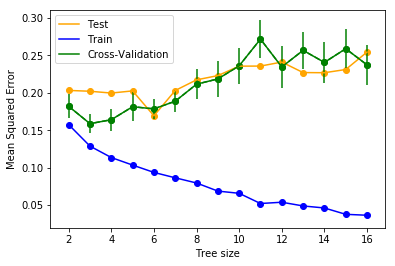

In [123]:
maxLeaves= 17
n0 = 2
msesTest = np.zeros((maxLeaves-n0))
msesTrain = np.zeros((maxLeaves-n0))
kfoldcv = np.zeros((maxLeaves-n0))
kerror = np.zeros((maxLeaves-n0))

nleaves = np.arange(n0,maxLeaves)
for i in nleaves:
    model = trees.DecisionTreeRegressor(max_leaf_nodes=i, min_samples_split =0.05, 
                                        min_samples_leaf=1,min_weight_fraction_leaf=0.0)
    model.fit(X_train, Y_train)
    y_test = model.predict(X_test)
    y_train = model.predict(X_train)
    msesTest[i-n0] = mse(Y_test,y_test)
    msesTrain[i-n0] = mse(Y_train,y_train)
    kscores = cross_val_score(estimator=model,scoring=make_scorer(mse), X=X_train, y=Y_train, cv=6)
    kfoldcv[i-n0] = kscores.mean()
    kerror[i-n0] = kscores.std()/np.sqrt(6)
    
    

print("De acuerdo a Cross-Validation, el mejor árbol tiene : {:d} hojas".format(np.argmin(kfoldcv)+2))
    
plt.plot(nleaves,msesTest, color = 'orange', label = 'Test')
plt.plot(nleaves,msesTrain, color = 'b', label = 'Train')
plt.plot(nleaves,kfoldcv, color = 'g', label = 'Cross-Validation')
plt.scatter(nleaves,msesTest, color = 'orange')
plt.scatter(nleaves,msesTrain, color = 'b')
plt.scatter(nleaves,kfoldcv, color = 'green')
plt.errorbar(nleaves,kfoldcv, yerr=kerror, color = 'green',fmt='--o',barsabove=True)

plt.legend()
plt.xlabel('Tree size')
plt.ylabel('Mean Squared Error')
plt.savefig('fig86.png')

In [124]:
#!wget https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/OJ.csv

In [125]:
data = pd.read_csv('OJ.csv')
#data = data[data != '?']
#data.dropna(inplace=True)

llaves = list(data.keys())
llaves.pop(14)
llaves.pop(0)
llaves.pop(0)


#data.num[data.num > 0] = 1 
#data.num[data.num == 0] = 0
#data.Purchase[data.Purchase == 'CH'] = 1 #Citrus Hill
#data.Purchase[data.Purchase == 'MM'] = 0 #Minute Maid Orange Juice

print(llaves)

Y = data['Purchase']
Y[Y == 'CH'] = 1
Y[Y == 'MM'] = 0
Y=Y.astype('int')
X = data[llaves]


# Split in train and test
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y, test_size=0.5)


# Initialize fitting method, fit and predict
f = trees.DecisionTreeClassifier()
#  Fit with train
f.fit(X_train, Y_train)
X_train.shape
y_test = f.predict(X_test)
y_train = f.predict(X_train)
#f.score(X_test, Y_test)
#mse(Y_train,y_train)
#mse(Y_test,y_test)

roc_auc_score(Y_train,y_train)

['WeekofPurchase', 'StoreID', 'PriceCH', 'PriceMM', 'DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM', 'LoyalCH', 'SalePriceMM', 'SalePriceCH', 'PriceDiff', 'PctDiscMM', 'PctDiscCH', 'ListPriceDiff', 'STORE']


/home/clarko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/clarko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9953271028037383

De acuerdo a Cross-Validation, el mejor árbol tiene : 2 hojas


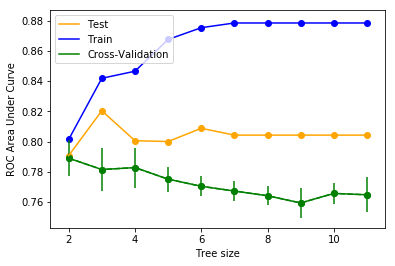

In [126]:
maxLeaves= 12
n0 = 2
msesTest = np.zeros((maxLeaves-n0))
msesTrain = np.zeros((maxLeaves-n0))
kfoldcv = np.zeros((maxLeaves-n0))
kerror = np.zeros((maxLeaves-n0))

nleaves = np.arange(n0,maxLeaves)
for i in nleaves:
    model = trees.DecisionTreeClassifier(max_depth=i, min_samples_split =0.05, 
                                        min_samples_leaf=1,min_weight_fraction_leaf=0.0)
    model.fit(X_train, Y_train)
    y_test = model.predict(X_test)
    y_train = model.predict(X_train)
    msesTest[i-n0] = roc_auc_score(Y_test,y_test)
    msesTrain[i-n0] = roc_auc_score(Y_train,y_train)
    kscores = cross_val_score(estimator=model,scoring=make_scorer(roc_auc_score,greater_is_better=True), X=X_train, y=Y_train, cv = 6)
    kfoldcv[i-n0] = kscores.mean()
    kerror[i-n0] = kscores.std()/np.sqrt(6)
    
    

print("De acuerdo a Cross-Validation, el mejor árbol tiene : {:d} hojas".format(np.argmax(kfoldcv)+2))
    
plt.plot(nleaves,msesTest, color = 'orange', label = 'Test')
plt.plot(nleaves,msesTrain, color = 'b', label = 'Train')
plt.plot(nleaves,kfoldcv, color = 'g', label = 'Cross-Validation')
plt.scatter(nleaves,msesTest, color = 'orange')
plt.scatter(nleaves,msesTrain, color = 'b')
plt.scatter(nleaves,kfoldcv, color = 'green')
plt.errorbar(nleaves,kfoldcv, yerr=kerror, color = 'green',fmt='--o',barsabove=True)
plt.legend()
plt.xlabel('Tree size')
plt.ylabel('ROC Area Under Curve')
plt.savefig('tercera.png')

In [127]:
type(Y_train[0])

numpy.int64